In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

mean -> ok
variance -> ok


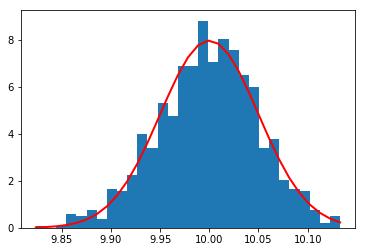

array([10.02847789,  9.88318924,  9.93309573, 10.08058215, 10.01848656,
        9.99679409, 10.07848768, 10.01514938, 10.10172663,  9.93854469,
       10.04344028, 10.02615693,  9.99720679, 10.04252439,  9.93270657,
        9.96662996, 10.03517141, 10.01390554, 10.0452298 ,  9.97518651,
       10.04422687, 10.02643912, 10.09986514, 10.06790003,  9.96027201,
       10.01572623, 10.01199836,  9.97308295, 10.00842951,  9.94640664,
        9.99757795, 10.02731674, 10.00980771, 10.02296561, 10.02781839,
       10.09327242,  9.99494817, 10.10048205,  9.99680215, 10.05653463,
       10.07599239,  9.98081503,  9.94723515,  9.93361562, 10.03072461,
       10.05353689,  9.92232581, 10.04612866,  9.92596242,  9.93698034,
        9.96080368, 10.04919161,  9.93063342,  9.91739803,  9.9287924 ,
       10.00350485, 10.01545781,  9.95951046, 10.00370364,  9.98169462,
       10.01259268,  9.99720301, 10.05007198,  9.98917789,  9.96355498,
        9.99267038, 10.06559095, 10.02870984, 10.0278143 , 10.01

In [2]:
def pdf_arr(mu, sigma, Nsamples, show_plot=False):

    # Generate array of random numbers with set distribution
    s = np.random.normal(mu, sigma, Nsamples)

    # Verify the mean and variance
    meanOK = abs(mu - np.mean(s)) < 0.01
    varianceOK = abs(sigma - np.std(s, ddof=1)) < 0.01
    
    if meanOK and varianceOK:
        print('mean -> ok\nvariance -> ok')
        if show_plot:
            # Display histogram of the samples
            count, bins, ignored = plt.hist(s, 30, normed=True)

            # Display probability density function
            # (probability density for Gaussian distribution)
            plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * 
                           np.exp( - (bins - mu)**2 / (2 * sigma**2)),
                    linewidth=2, color='r')
            plt.show()
        return s
    else:
        # Regenerate values/plots if samples not norm
        print('rerunning')
        pdf_arr(mu, sigma, Nsamples, show_plot=show_plot)
        
pdf_arr(10, 0.05, 1000, show_plot=True)

check accuracy-> True


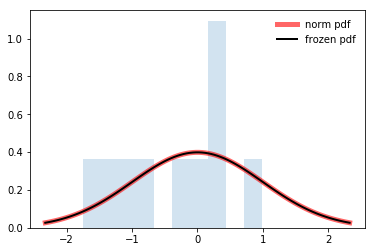

In [3]:
fig, ax = plt.subplots(1, 1)

# Calculate a first few moments
mean, var, skew, kurt = norm.stats(moments='mvsk')

# Display the probability density function (pdf) -> red
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
        'r-', lw=5, alpha=0.6, label='norm pdf')

# Freeze the distribution and display the frozen pdf -> black
rv = norm()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

# Check accuracy of cdf and ppf
vals = norm.ppf([0.001, 0.5, 0.999])
print("check accuracy->", 
      np.allclose([0.001, 0.5, 0.999], norm.cdf(vals)))

# Generate random numbers
r = norm.rvs(size=10)

# Compare histogram of randomly generated numbers to norm dist
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()